In [13]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns
from collections import Counter
color = sns.color_palette()

from helpers import *


In [2]:
def uniques(series): return len(series.unique())/len(series)

def uniques_df(df):
    for column in df.columns:
        print(column, '::>>', uniques(df[column]))


In [4]:
csvs = [f for f in listdir('data') if isfile(join('data', f))]

In [16]:
products = pd.read_csv('data/products.csv')
orders = pd.read_csv('data/orders.csv')
order_train = pd.read_csv('data/order_products__train.csv')
departments = pd.read_csv('data/departments.csv')
aisles = pd.read_csv('data/aisles.csv')
order_prior = pd.read_csv('data/order_products__prior.csv')
sample_sub = pd.read_csv('data/sample_submission.csv')

In [9]:
cnt_srs = orders.groupby("eval_set").aggregate(uniques)
cnt_srs

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
eval_set,,,,,,
prior,1,0.064142,0.000031,0.000002,0.000007,0.000010
test,1,1.000000,0.001293,0.000093,0.000320,0.000413
train,1,1.000000,0.000739,0.000053,0.000183,0.000236


In [ ]:
or

/Users/sora/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


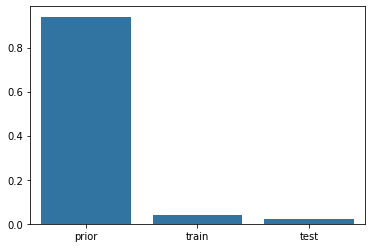

In [15]:
uniques_orders = {k[0]:k[1]/len(orders.eval_set) for k in dict(Counter(orders.eval_set)).items()}

sns.barplot(list(uniques_orders.keys()), list(uniques_orders.values()), color = color[0])


In [17]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


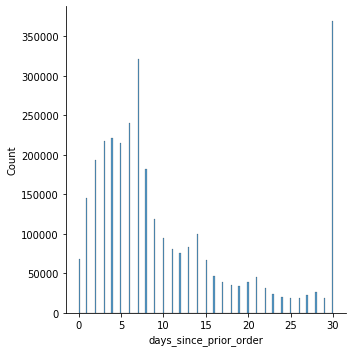

In [18]:
sns.displot(orders.days_since_prior_order)

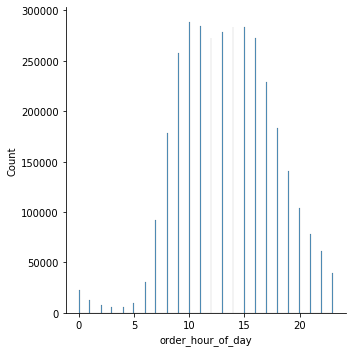

In [19]:
sns.displot(orders.order_hour_of_day)